<a href="https://colab.research.google.com/github/alexbezus/Machine_learning/blob/main/Machine_learning_10_November.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Описать задачу словами


Описание задачи

Задача машинного обучения, с которой мы имеем дело, — это анализ данных о фильмах индийского производства с целью проведения предиктивного анализа. Наша конечная задача - предсказание кинематографического успеха, оцениваемого по рейтингу.

- Это фильмы из Индии;
- Предсказываемое значение (целевая переменная): Это численный рейтинг (задача регрессии).

1. Прочитать данные


In [60]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
url = "https://raw.githubusercontent.com/alexbezus/Machine_learning/main/IMDb%20Movies%20India.csv"
data_raw = pd.read_csv(url,encoding='latin-1')

In [62]:
data_raw

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Данный датасет включает такие атрибуты, как название фильма, год выпуска, продолжительность, жанр, рейтинг, количество голосов и информацию о режиссере и актерах.
- Объем данных (N): Количество записей (фильмов) в датасете - 15509
- Количество признаков (d): Кол-во переменных, которые используются для предсказания (не включая целевую переменную) - 8
- Содержит пропущенные значения

2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)

Cначала избавимся от пропущенных значений.

In [64]:
data_raw = data_raw.dropna(subset=['Year'])
data_raw = data_raw.dropna(subset=['Duration'])
data_raw = data_raw.dropna(subset=['Genre'])
data_raw = data_raw.dropna(subset=['Director'])
data_raw = data_raw.dropna(subset=['Rating'])
data_raw = data_raw.dropna(subset=['Actor 1'])
data_raw = data_raw.dropna(subset=['Actor 2'])
data_raw = data_raw.dropna(subset=['Actor 3'])
data_raw = data_raw.dropna(subset=['Votes'])

После этих изменений наш датасет содержит 5659 записей и 0 пропущенных значений

In [65]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [66]:
missing_values_per_column = data_raw.isna().sum()
print(missing_values_per_column)

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


Для дальнейшего вычисления основных характеристик и визуализации обработаем признаки "Duration", "Year", "Votes" как числовые.

In [67]:
#Преобразуем к виду, в котором нет скобок
data_raw['Year'] = data_raw['Year'].str.extract('(\d+)')
data_raw['Year'] = data_raw['Year'].astype(int)

In [68]:
#Удаляем min после значения длительности
data_raw['Duration'] = data_raw['Duration'].str.replace(' min', '')
data_raw['Duration'] = data_raw['Duration'].astype(int)

In [69]:
#Удаляем запятые между рязрядами чисел
data_raw['Votes'] = data_raw['Votes'].str.replace(',', '').astype(int)

In [70]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


Вычислим разброс, среднее, корреляционную матрицу

In [71]:
data_raw.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


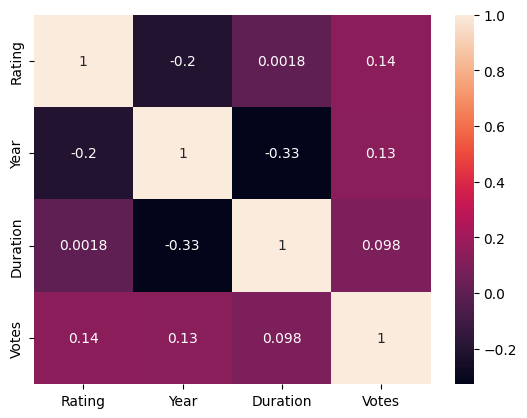

In [76]:
corr_matrix = data_raw[['Rating', 'Year', 'Duration', 'Votes']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Признаки "Year" и "Duration" имеют среднюю отрицательную линейную связь. "Rating" и "Year" имеют слабую отрицательную линейную связь. Остальные признаки имеют между собой также слабые линейные связи

Визуализируем данные

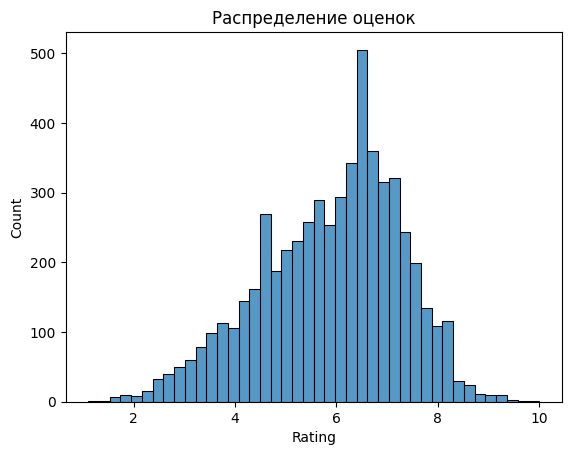

In [78]:
# Гистограмма оценок
sns.histplot(data_raw['Rating']).set_title('Распределение оценок')
plt.show()


Наиболее распространнёные оценки находятся в диапазоне от 6 до 7.6 баллов.

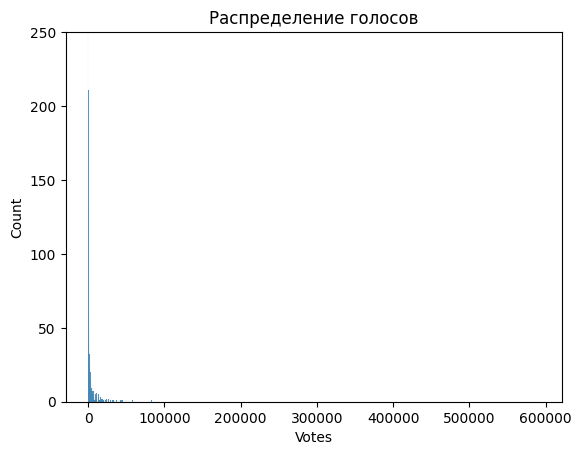

In [79]:
# Гистограмма голосов
sns.histplot(data_raw['Votes']).set_title('Распределение голосов')
plt.ylim(0,250)
plt.show()

Из-за выбросов на гистограмме ничего не видно, избавимся от них.

In [80]:
rows_to_drop = data_raw[
    (data_raw['Votes'] < data_raw['Votes'].quantile(0.005)) | (data_raw['Votes'] > data_raw['Votes'].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)
data_raw.shape

(5630, 10)

Визуализируем снова.

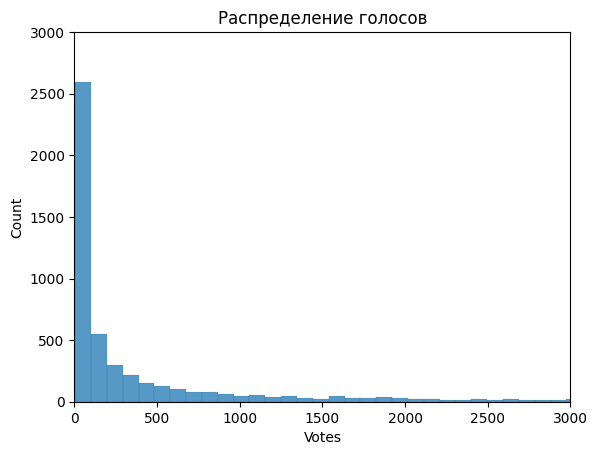

In [81]:
# Гистограмма голосов
sns.histplot(data_raw['Votes']).set_title('Распределение голосов')
plt.ylim(0,3000)
plt.xlim(0,3000)
plt.show()

Наибольшее количество голосов находится в диапазоне от 0 до 100.

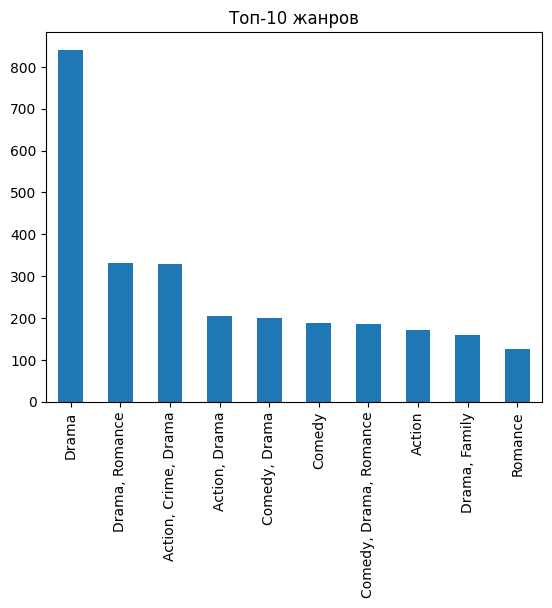

In [82]:
# График для категориальных переменных
data_raw['Genre'].value_counts().head(10).plot(kind='bar', title='Топ-10 жанров')
plt.show()

Самый популярный жанр - Драма.

4. Обработать категориальные признаки

Обрабатывать как категориальные будем признаки "Жанр", "Режиссёр", "Актёр 1", "Актёр 2", "Актёр 3"

In [83]:
data_raw['Genre'] = data_raw['Genre'].astype('category')
data_raw['Director'] = data_raw['Director'].astype('category')
data_raw['Actor 1']=data_raw['Actor 1'].astype('category')
data_raw['Actor 2']=data_raw['Actor 2'].astype('category')
data_raw['Actor 3']=data_raw['Actor 3'].astype('category')

In [84]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      5630 non-null   object  
 1   Year      5630 non-null   int64   
 2   Duration  5630 non-null   int64   
 3   Genre     5630 non-null   category
 4   Rating    5630 non-null   float64 
 5   Votes     5630 non-null   int64   
 6   Director  5630 non-null   category
 7   Actor 1   5630 non-null   category
 8   Actor 2   5630 non-null   category
 9   Actor 3   5630 non-null   category
dtypes: category(5), float64(1), int64(3), object(1)
memory usage: 660.2+ KB


Применим кодирование частотой для категориальных признаков

In [85]:
# Функция для подсчета частот и замены на значения частоты
def frequency_encoding(column):
    # Подсчёт частоты появления каждой категории в столбце
    frequency_map = data_raw[column].value_counts().to_dict()
    # Замена категории на её частоту
    data_raw[column] = data_raw[column].map(frequency_map)

In [86]:
frequency_encoding('Actor 1')
frequency_encoding('Actor 2')
frequency_encoding('Actor 3')
frequency_encoding('Director')
frequency_encoding('Genre')


In [87]:
data_raw[['Actor 1', 'Actor 2', 'Actor 3', 'Director','Genre']]

,Actor 1,Actor 2,Actor 3,Director,Genre
1,2,1,1,1,841
3,5,1,2,1,107
5,18,15,11,15,44
6,20,3,8,6,5
8,1,6,1,1,9
...,...,...,...,...,...
15493,4,1,2,1,841
15494,7,52,11,22,15
15503,13,1,6,10,328
15505,82,10,24,8,205


In [89]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5630 non-null   object 
 1   Year      5630 non-null   int64  
 2   Duration  5630 non-null   int64  
 3   Genre     5630 non-null   int64  
 4   Rating    5630 non-null   float64
 5   Votes     5630 non-null   int64  
 6   Director  5630 non-null   int64  
 7   Actor 1   5630 non-null   int64  
 8   Actor 2   5630 non-null   int64  
 9   Actor 3   5630 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 483.8+ KB


Теперь data_raw содержит закодированные частотами значения для актёров, жанра и режиссёра

5. Провести нормализацию

Проведём Min-Max нормализацию

In [90]:
#Инициализируем нормализатор
scaler = MinMaxScaler()

In [91]:
# Выбираем числовые признаки для нормализации(все, кроме целевой переменной)
features_to_normalize = ['Year', 'Duration','Votes','Actor 1','Actor 2','Actor 3','Genre','Director']

# Подгоняем и преобразуем данные
data_raw[features_to_normalize] = scaler.fit_transform(data_raw[features_to_normalize])

In [93]:
data_raw

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),0.977778,0.315412,1.000000,7.0,0.000046,0.000,0.009709,0.000000,0.000000
3,#Yaaram,0.977778,0.318996,0.126190,4.4,0.000462,0.000,0.038835,0.000000,0.017857
5,...Aur Pyaar Ho Gaya,0.733333,0.451613,0.051190,4.7,0.012653,0.350,0.165049,0.274510,0.178571
6,...Yahaan,0.822222,0.433692,0.004762,7.4,0.016639,0.125,0.184466,0.039216,0.125000
8,?: A Question Mark,0.900000,0.218638,0.009524,5.6,0.004941,0.000,0.000000,0.098039,0.000000
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,0.933333,0.336918,1.000000,6.1,0.006203,0.000,0.029126,0.000000,0.017857
15494,Zubeidaa,0.777778,0.473118,0.016667,6.2,0.022950,0.525,0.058252,1.000000,0.178571
15503,Zulm Ki Zanjeer,0.644444,0.372760,0.389286,5.8,0.000600,0.225,0.116505,0.000000,0.089286
15505,Zulmi,0.755556,0.387097,0.242857,4.5,0.010005,0.175,0.786408,0.176471,0.410714


Теперь data_raw содержит нормализованные значения в указанных столбцах

6. Разбить данные на обучающую и тестовую выборки

In [94]:
X = data_raw[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data_raw['Rating']#целевая переменная

In [95]:
# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [97]:
# Проверяем размеры наборов
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 8)
(1126, 8)
(4504,)
(1126,)


7. Запустить классификатор (ререссию) ближайших соседей
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей). Сделать выводы

In [98]:
k_ = np.arange(1, 100, 1)
mse_arr = [0] * len(k_)
for i in range(1, len(k_) + 1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  # Предсказание
  y_pred = knn.predict(X_test)
  mse_arr[i - 1] = mean_squared_error(y_test, y_pred)

print(f'MSE: {min(mse_arr)}')

MSE: 1.4902102143773432


(1.45, 1.6)

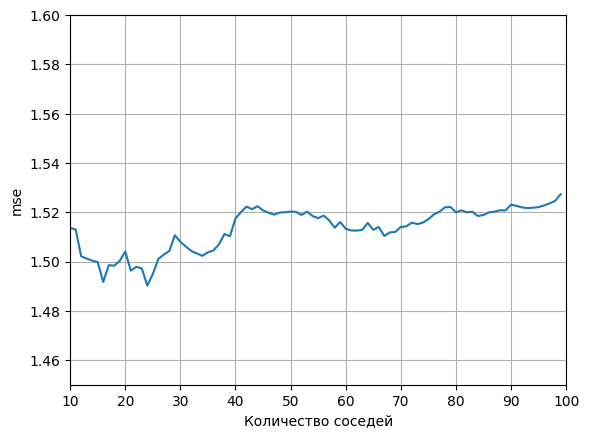

In [99]:
mse_arr.index(min(mse_arr))
mse_arr
plt.plot(range(1, len(mse_arr) + 1), mse_arr)
plt.grid()
plt.xlabel('Количество соседей')
plt.ylabel('mse')
plt.xlim(10, 100)
plt.ylim(1.45, 1.6)

In [104]:
# Инициализация и обучение модели
knn = KNeighborsRegressor(n_neighbors=24)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24)

Оптимальное значение гиперпараметра = 24

In [105]:
# Предсказание
y_pred = knn.predict(X_test)

In [110]:
# Вычисление MSE и RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

In [111]:
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1.4902102143773432
RMSE: 1.2207416657005459


In [112]:
y_test.median()

6.0

9. Сделать общие выводы.

Из полученных результатов видно, что среднеквадратическая ошибка (MSE) составляет 1.49, а корень из среднеквадратической ошибки (RMSE) равен 1.22. Это означает, что модель имеет умеренную точность в предсказании рейтинга фильмов. Учитывая, что медианное значение рейтинга в тестовой выборке составляет 6.0, можно сказать, что средняя ошибка предсказания составляет примерно 1.22, что составляет около 20% от медианного значения. Модель не всегда точно предсказывает рейтинги фильмов.